# Create AI Machine Learning Agent That Makes 30+ ML Models In 30 Seconds

In this notebook, I will show you how to create an AI machine learning agent that can make 30+ machine learning models in 30 seconds. This AI agent will be able to make models for classification and regression tasks. 

The AI agent uses `h2o` library for AutoML. `h2o` is an open-source machine learning platform that is used for building machine learning models. It is easy to use and provides a lot of flexibility in building machine learning models.

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)

## H2O Machine Learning Agent

In this notebook, we will create an AI Machine Learning Agent that makes 30+ machine learning models in 30 seconds. The AI Agent will use the H2O AutoML library to create the models, store the models on your computer, and provide you with a summary of the models, performance metrics, and full breakdown of the AI machine learning workflow.

### Load Libraries

In [1]:

from langchain_openai import ChatOpenAI
import pandas as pd
import h2o # pip install h2o
import os
import yaml

from ai_data_science_team.ml_agents import H2OMLAgent

### Load The Customer Churn Dataset

The Customer Churn dataset contains data on customers who have left the company. The dataset contains 21 columns and 7,043 rows. The target variable is `Churn` which is a binary variable that indicates whether the customer has left the company or not.

In [2]:
df = pd.read_csv("data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### LLM Setup

Run the code to set up your OpenAI API Key and set up key inputs for the LLM model creation and H2O AutoML model creation.

In [3]:
os.environ['OPENAI_API_KEY'] = "YOUR_OPENAI_API_KEY"
os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

# Define constants for model, logging, and paths
MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = "logs/"
MODEL_PATH = "h2o_models/"

# Initialize the language model
llm = ChatOpenAI(model=MODEL)
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x7f8f19ac6f50>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x7f8f19aed8a0>, root_client=<openai.OpenAI object at 0x7f8eb8460520>, root_async_client=<openai.AsyncOpenAI object at 0x7f8f19ac6fb0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Create the Agent

Run the code to create the AI Machine Learning Agent that makes 30+ machine learning models in 30 seconds.

- `model` - The LLM to use.
- `log` and `log_path` - Set to `True` to log the Python function (pipeline) to a file in the `LOG_PATH` directory. (/logs by default)
- `model_directory` - The directory to save the models. (/models by default)
- `enable_mlflow` - Set to `True` to enable MLflow tracking. This is required to complete [the MLflowToolsAgent tutorial](/examples/ml_agents/mlflow_tools_agent.ipynb).

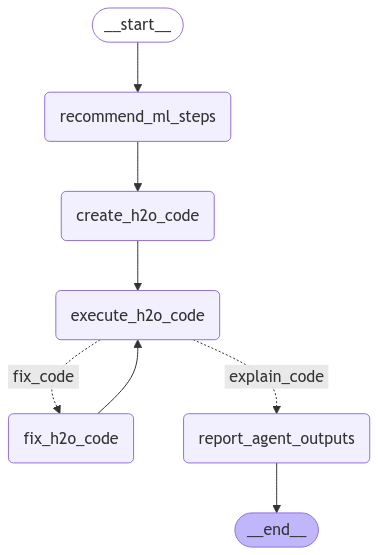

In [6]:
ml_agent = H2OMLAgent(
    model=llm, 
    log=True, 
    log_path=LOG_PATH,
    model_directory=MODEL_PATH, 
    enable_mlflow=True, # Use this if you wish to log to MLflow 
)
ml_agent

### Run the Agent

Run the code to run the AI Machine Learning Agent and create the models.

In [7]:

ml_agent.invoke_agent(
    data_raw=df.drop(columns=["customerID"]),
    user_instructions="Please do classification on 'Churn'. Use a max runtime of 30 seconds.",
    target_variable="Churn"
)

---H2O ML AGENT----
    * RECOMMEND MACHINE LEARNING STEPS
    * CREATE H2O AUTOML CODE
      File saved to: logs/h2o_automl.py
    * EXECUTING AGENT CODE
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,7 hours 14 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,10 months and 4 days
H2O_cluster_name:,H2O_from_python_mdancho_ag7ena
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.99 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
18:27:21.352: Stopping tolerance set by the user is < 70% of the recommended default of 0.011915743770127944, so models may take a long time to converge or may not converge at all.

███████████████████████████████████████████████████████████████| (done) 100%
    * REPORT AGENT OUTPUTS


/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


#### Leaderboard

The leaderboard shows the ML models created by the AI Machine Learning Agent ranked by various ML metrics.

In [8]:
# Retrieve and display the leaderboard of models
ml_agent.get_leaderboard()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,StackedEnsemble_BestOfFamily_2_AutoML_2_202501...,0.850006,0.410950,0.666045,0.228422,0.365294,0.133439
1,StackedEnsemble_BestOfFamily_1_AutoML_2_202501...,0.849827,0.411221,0.665194,0.226759,0.365353,0.133483
2,StackedEnsemble_AllModels_2_AutoML_2_20250117_...,0.849722,0.411135,0.666036,0.224464,0.365316,0.133456
3,StackedEnsemble_BestOfFamily_4_AutoML_2_202501...,0.849691,0.410955,0.667338,0.230516,0.365232,0.133394
4,StackedEnsemble_AllModels_1_AutoML_2_20250117_...,0.849660,0.411465,0.664531,0.230069,0.365506,0.133594
5,StackedEnsemble_BestOfFamily_3_AutoML_2_202501...,0.849502,0.411334,0.667723,0.226358,0.365353,0.133483
6,StackedEnsemble_AllModels_3_AutoML_2_20250117_...,0.848822,0.411923,0.664691,0.227170,0.365783,0.133797
7,GBM_1_AutoML_2_20250117_182721,0.847581,0.414998,0.662772,0.229477,0.367105,0.134766
8,XGBoost_grid_1_AutoML_2_20250117_182721_model_1,0.845952,0.415312,0.660968,0.236311,0.367351,0.134947
9,XGBoost_grid_1_AutoML_2_20250117_182721_model_7,0.845670,0.419965,0.658424,0.238885,0.368094,0.135493


#### Get The AI Generated Python Code

The AI Machine Learning Agent will generate Python code that was used to create the models.

In [9]:
# Get the H2O training function in markdown format
ml_agent.get_h2o_train_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: h2o_ml_agent
# Time Created: 2025-01-17 18:27:20

def h2o_automl(data_raw, model_directory=None, log_path=None):
    import h2o
    from h2o.automl import H2OAutoML
    import pandas as pd



    # Initialize or connect to H2O if not already started
    h2o.init()

    # Convert the pandas DataFrame to an H2OFrame
    data_h2o = h2o.H2OFrame(data_raw)

    # Identify the target variable and predictors
    target = "Churn"
    x = [col for col in data_h2o.columns if col != target]

    # Convert target variable to factor (categorical)
    data_h2o[target] = data_h2o[target].asfactor()

    # Set AutoML parameters based on user instructions
    aml = H2OAutoML(
        max_runtime_secs=30,
        exclude_algos=["DeepLearning"],
        stopping_metric="AUC",
        stopping_rounds=3,
        stopping_tolerance=0.001,
        balance_classes=True,
        seed=42
    )

    # Train AutoML model
    aml.train(x=x, y=target, training_frame=data_h2o)

    # Determine model saving logic
    if model_directory is None and log_path is None:
        model_path = None
    else:
        the_directory = model_directory if model_directory is not None else log_path
        model_path = h2o.save_model(model=aml.leader, path=the_directory, force=True)

    return {
        "leaderboard": aml.leaderboard.as_data_frame().to_dict(),
        "best_model_id": aml.leader.model_id,
        "model_path": model_path,
    }
```

#### Recommended ML Steps

The AI Machine Learning Agent will provide you with a recommended set of ML steps, which were used to help the Coding Agent create the H2O AutoML models.

In [10]:
# Get the recommended machine learning steps in markdown format
ml_agent.get_recommended_ml_steps(markdown=True)

# Recommended ML Steps:
Here is a recommended list of steps and considerations for performing H2O AutoML on the provided dataset, focusing on maximizing model accuracy while adhering to the user instructions:

1. **Initialize H2O Cluster**:
   - Start the H2O cluster locally.
   ```python
   import h2o
   h2o.init()
   ```

2. **Import Dataset**:
   - Load the dataset into the H2O environment.
   ```python
   data = h2o.import_file("path_to_your_dataset.csv")
   ```

3. **Identify Predictors and Response**:
   - Define the response column (`y`) and the predictor columns (`x`).
   ```python
   y = "Churn"  # response column
   x = data.columns
   x.remove(y)  # predictors
   ```

4. **Convert Response Column to Factor**:
   - Convert the response variable to a categorical type, as it is a classification problem.
   ```python
   data[y] = data[y].asfactor()
   ```

5. **Set AutoML Parameters**:
   - Specify `max_runtime_secs` to 30 seconds as per user instructions.
   - Exclude Deep Learning algorithms to focus on potentially higher-performing models.
   ```python
   aml = H2OAutoML(max_runtime_secs=30, exclude_algos=["DeepLearning"], seed=42)
   ```

6. **Set Stopping Criteria**:
   - Use `stopping_metric` to specify AUC as the metric for early stopping, which is relevant for binary classification.
   - Set `stopping_rounds` to 3 to allow some patience for model improvement.
   - Set `stopping_tolerance` to 0.001 for relative improvement.
   ```python
   aml = H2OAutoML(max_runtime_secs=30, exclude_algos=["DeepLearning"], 
                   stopping_metric="AUC", stopping_rounds=3, stopping_tolerance=0.001, seed=42)
   ```

7. **Balance Classes** (if applicable):
   - Consider setting `balance_classes=True` to help handle any class imbalance if present in the dataset.
   ```python
   aml = H2OAutoML(max_runtime_secs=30, exclude_algos=["DeepLearning"], 
                   stopping_metric="AUC", stopping_rounds=3, stopping_tolerance=0.001, 
                   balance_classes=True, seed=42)
   ```

8. **Train AutoML**:
   - Train the AutoML model with the defined parameters.
   ```python
   aml.train(x=x, y=y, training_frame=data)
   ```

9. **Review Leaderboard**:
   - After training, extract and review the leaderboard to evaluate model performances.
   ```python
   lb = aml.leaderboard
   ```

10. **Select Best Model**:
   - Identify and retrieve the best model based on the default metric (AUC for binary classification).
   ```python
   best_model = aml.leader
   ```

By following these steps, you can effectively set up and execute H2O AutoML on the provided dataset while maximizing predictive accuracy and adhering to user specifications.

#### Get A Complete Workflow Summary

The AI Machine Learning Agent will provide you with a complete workflow summary that includes the Best ML model created, the recommended ML steps, and the Python code used to create the models.

In [11]:
# Get a summary of the workflow in markdown format
ml_agent.get_workflow_summary(markdown=True)

# H2O Machine Learning Agent Outputs

## ---RECOMMENDED STEPS----
# Recommended ML Steps:
Here is a recommended list of steps and considerations for performing H2O AutoML on the provided dataset, focusing on maximizing model accuracy while adhering to the user instructions:

1. **Initialize H2O Cluster**:
   - Start the H2O cluster locally.
   ```python
   import h2o
   h2o.init()
   ```

2. **Import Dataset**:
   - Load the dataset into the H2O environment.
   ```python
   data = h2o.import_file("path_to_your_dataset.csv")
   ```

3. **Identify Predictors and Response**:
   - Define the response column (`y`) and the predictor columns (`x`).
   ```python
   y = "Churn"  # response column
   x = data.columns
   x.remove(y)  # predictors
   ```

4. **Convert Response Column to Factor**:
   - Convert the response variable to a categorical type, as it is a classification problem.
   ```python
   data[y] = data[y].asfactor()
   ```

5. **Set AutoML Parameters**:
   - Specify `max_runtime_secs` to 30 seconds as per user instructions.
   - Exclude Deep Learning algorithms to focus on potentially higher-performing models.
   ```python
   aml = H2OAutoML(max_runtime_secs=30, exclude_algos=["DeepLearning"], seed=42)
   ```

6. **Set Stopping Criteria**:
   - Use `stopping_metric` to specify AUC as the metric for early stopping, which is relevant for binary classification.
   - Set `stopping_rounds` to 3 to allow some patience for model improvement.
   - Set `stopping_tolerance` to 0.001 for relative improvement.
   ```python
   aml = H2OAutoML(max_runtime_secs=30, exclude_algos=["DeepLearning"], 
                   stopping_metric="AUC", stopping_rounds=3, stopping_tolerance=0.001, seed=42)
   ```

7. **Balance Classes** (if applicable):
   - Consider setting `balance_classes=True` to help handle any class imbalance if present in the dataset.
   ```python
   aml = H2OAutoML(max_runtime_secs=30, exclude_algos=["DeepLearning"], 
                   stopping_metric="AUC", stopping_rounds=3, stopping_tolerance=0.001, 
                   balance_classes=True, seed=42)
   ```

8. **Train AutoML**:
   - Train the AutoML model with the defined parameters.
   ```python
   aml.train(x=x, y=y, training_frame=data)
   ```

9. **Review Leaderboard**:
   - After training, extract and review the leaderboard to evaluate model performances.
   ```python
   lb = aml.leaderboard
   ```

10. **Select Best Model**:
   - Identify and retrieve the best model based on the default metric (AUC for binary classification).
   ```python
   best_model = aml.leader
   ```

By following these steps, you can effectively set up and execute H2O AutoML on the provided dataset while maximizing predictive accuracy and adhering to user specifications.

## ---H2O TRAIN FUNCTION----
```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: h2o_ml_agent
# Time Created: 2025-01-17 18:27:20

def h2o_automl(data_raw, model_directory=None, log_path=None):
    import h2o
    from h2o.automl import H2OAutoML
    import pandas as pd



    # Initialize or connect to H2O if not already started
    h2o.init()

    # Convert the pandas DataFrame to an H2OFrame
    data_h2o = h2o.H2OFrame(data_raw)

    # Identify the target variable and predictors
    target = "Churn"
    x = [col for col in data_h2o.columns if col != target]

    # Convert target variable to factor (categorical)
    data_h2o[target] = data_h2o[target].asfactor()

    # Set AutoML parameters based on user instructions
    aml = H2OAutoML(
        max_runtime_secs=30,
        exclude_algos=["DeepLearning"],
        stopping_metric="AUC",
        stopping_rounds=3,
        stopping_tolerance=0.001,
        balance_classes=True,
        seed=42
    )

    # Train AutoML model
    aml.train(x=x, y=target, training_frame=data_h2o)

    # Determine model saving logic
    if model_directory is None and log_path is None:
        model_path = None
    else:
        the_directory = model_directory if model_directory is not None else log_path
        model_path = h2o.save_model(model=aml.leader, path=the_directory, force=True)

    return {
        "leaderboard": aml.leaderboard.as_data_frame().to_dict(),
        "best_model_id": aml.leader.model_id,
        "model_path": model_path,
    }
```

## ---H2O TRAIN FUNCTION PATH----
```python
logs/h2o_automl.py
```

## ---H2O TRAIN FUNCTION NAME----
```python
h2o_automl
```

## ---H2O TRAIN ERROR----
None

## ---MODEL PATH----
None

## ---BEST MODEL ID----
StackedEnsemble_BestOfFamily_2_AutoML_2_20250117_182721

#### Get The Logging Summary 

The AI Machine Learning Agent will provide you with a logging summary that includes the ML models created and Python code location.

In [12]:
# Get a summary of the logs in markdown format
ml_agent.get_log_summary(markdown=True)


## H2O Machine Learning Agent Log Summary:

Function Path: logs/h2o_automl.py

Function Name: h2o_automl

Best Model ID: StackedEnsemble_BestOfFamily_2_AutoML_2_20250117_182721

Model Path: None
                

#### Get the Best Model ID

In [18]:
ml_agent.get_best_model_id()

'StackedEnsemble_BestOfFamily_2_AutoML_2_20250117_182721'

### Load The Model

Run the code to load the model and view the model summary, get performance metrics, make predictions, and explain the model.

In [20]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,7 hours 22 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,10 months and 4 days
H2O_cluster_name:,H2O_from_python_mdancho_ag7ena
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.94 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


#### Load The Model and Display Performance

In [21]:
# Load the model
model = h2o.get_model(ml_agent.get_best_model_id())

model

key,value
Stacking strategy,cross_validation
Number of base models (used / total),2/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),0/1
# GLM base models (used / total),1/1
# DRF base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


#### Make Predictions

Run the code to make predictions using the model.

In [22]:
# Make predictions using the loaded model
model.predict(h2o.H2OFrame(df))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,No,Yes
Yes,0.335686,0.664314
No,0.96382,0.0361802
Yes,0.651524,0.348476
No,0.971191,0.028809
Yes,0.357133,0.642867
Yes,0.168803,0.831197
Yes,0.582106,0.417894
No,0.753557,0.246443
Yes,0.419517,0.580483
No,0.982409,0.0175906


# Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)